In [ ]:
#%matplotlib notebook

In [1]:
# import dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats
import requests
import matplotlib.axes as ax
from api_keys import census_api

In [2]:
# add 2011 crime data
homicide = pd.read_csv("Data/homicide_matt.csv", encoding="utf-8") 
homicide.head()

,CASE #,Date of Occurance,Primary Description,Description,Beat,Ward,Year,Latitude,Longitude,Month
0,HT405253,7/19/2011,HOMICIDE,FIRST DEGREE MURDER,732,6.0,2011,41.766565,-87.638386,7
1,HT578691,11/7/2011,HOMICIDE,FIRST DEGREE MURDER,2123,4.0,2011,41.822200,-87.602135,11
2,HT576092,11/5/2011,HOMICIDE,FIRST DEGREE MURDER,1122,28.0,2011,41.877169,-87.719061,11
3,HT581763,11/9/2011,HOMICIDE,FIRST DEGREE MURDER,522,34.0,2011,41.688889,-87.628242,11
4,HT582731,11/10/2011,HOMICIDE,FIRST DEGREE MURDER,614,18.0,2011,41.741304,-87.659690,11


In [3]:
year_group = homicide.groupby("Year")
year_plot = year_group['CASE #'].count().reset_index()
year_plot

,Year,CASE #
0,2001,667
1,2006,477
2,2011,438
3,2016,788
4,2020,813


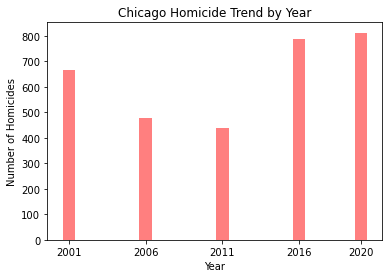

In [4]:
# set the coordiantes for the graph
y_axis = year_plot['CASE #']
x_axis = year_plot['Year']

#plot the graph
plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# Give our chart some labels and a tile
plt.title("Chicago Homicide Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Homicides")


plt.savefig("images/year_trend.png")
plt.show()


In [5]:
# group by month
month_group = homicide.groupby("Month")
month_group = month_group['CASE #'].count().reset_index()

# calculate month percentages
seasonality = month_group['CASE #'] / month_group['CASE #'].sum()
seasonality.reset_index()
month_group['percent'] = seasonality
month_group['percent'] = month_group['percent'].map("{:,.2%}".format)
month_group

,Month,CASE #,percent
0,1,206,6.47%
1,2,151,4.74%
2,3,185,5.81%
3,4,221,6.94%
4,5,277,8.70%
5,6,333,10.46%
6,7,380,11.94%
7,8,289,9.08%
8,9,315,9.90%
9,10,306,9.61%


In [6]:
# group by ward
ward_group = homicide.groupby("Ward")
ward_group = ward_group['CASE #'].count().reset_index()

# calculate month percentages
ward_distro = ward_group['CASE #'] / ward_group['CASE #'].sum()
ward_distro.reset_index()
ward_group['percent'] = ward_distro
ward_group['percent'] = ward_group['percent'].map("{:,.2%}".format)
ward_sort = ward_group.sort_values(by=['percent'], ascending = False)

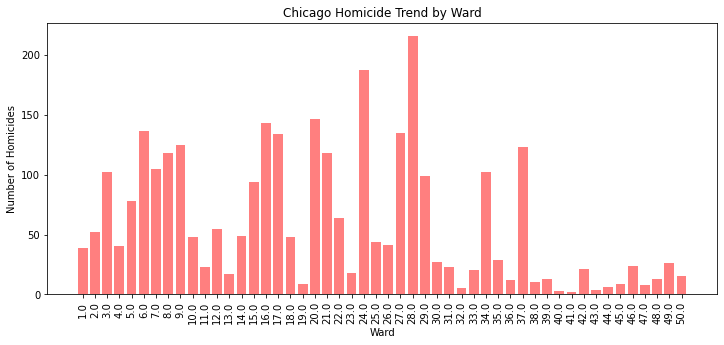

In [7]:
# set the coordiantes for the graph
y_axis = ward_sort['CASE #']
x_axis = ward_sort['Ward']

# set figure size
plt.figure(figsize=[12,5])

# string index
ward_sort.index = ward_sort.index.astype(str)

# reverse dataframe
ward_sort = ward_sort[::-1]

plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation=90)

# Give our chart some labels and a tile
plt.title("Chicago Homicide Trend by Ward")
plt.xlabel("Ward")
plt.ylabel("Number of Homicides")

plt.savefig("images/wards.png")
plt.show()

In [8]:
# filter the dataframe to display only year we want to look at
data2020 = homicide.loc[homicide['Year'] == 2020]

# group by month
month20 = data2020.groupby('Month')
month20_count = month20['CASE #'].count().reset_index()

# Calculate % of total
percent_tot20 = month20_count['CASE #'] / month20_count['CASE #'].sum()
percent_tot20.reset_index()
month20_count['percent'] = percent_tot20
month20_count['year'] = 2020

In [9]:
# filter the dataframe to display only year we want to look at
data2016 = homicide.loc[homicide['Year'] == 2016]

# group by month
month16 = data2016.groupby('Month')
month16_count = month16['CASE #'].count().reset_index()

# Calculate % of total
percent_tot16 = month16_count['CASE #'] / month16_count['CASE #'].sum()
percent_tot16.reset_index()
month16_count['percent'] = percent_tot16
month16_count['year'] = 2016

In [10]:
# filter the dataframe to display only year we want to look at
data2011 = homicide.loc[homicide['Year'] == 2011]

# group by month
month11 = data2011.groupby('Month')
month11_count = month11['CASE #'].count().reset_index()

# Calculate % of total
percent_tot11 = month11_count['CASE #'] / month11_count['CASE #'].sum()
percent_tot11.reset_index()
month11_count['percent'] = percent_tot11
month11_count['year'] = 2011

In [11]:
# filter the dataframe to display only year we want to look at
data2006 = homicide.loc[homicide['Year'] == 2006]

# group by month
month06 = data2006.groupby('Month')
month06_count = month06['CASE #'].count().reset_index()

# Calculate % of total
percent_tot06 = month06_count['CASE #'] / month06_count['CASE #'].sum()
percent_tot06.reset_index()
month06_count['percent'] = percent_tot16
month06_count['year'] = 2006

In [12]:
# filter the dataframe to display only year we want to look at
data2001 = homicide.loc[homicide['Year'] == 2001]

# group by month
month01 = data2001.groupby('Month')
month01_count = month01['CASE #'].count().reset_index()

# Calculate % of total
percent_tot01 = month01_count['CASE #'] / month01_count['CASE #'].sum()
percent_tot01.reset_index()
month01_count['percent'] = percent_tot01
month01_count['year'] = 2001

In [13]:
# merge dataframes
frames = [month11_count, month16_count, month20_count, month06_count, month01_count]

count_merge = pd.concat(frames)

In [14]:
# Merge two dataframes using a left join
merge1 = pd.merge(month01_count, month06_count, on="Month", how="left")

# remove extra columns
merge1 = merge1.drop(columns=['year_x','CASE #_x','year_y','CASE #_y'])

# rename so data is consistent
merge1 = merge1.rename(columns={'percent_x':'2001',
                                'percent_y':'2006'}
                      )

## repeat steps to add in other years

# Merge two dataframes using a left join
merge2 = pd.merge(merge1, month11_count, on="Month", how="left")

# remove extra columns
merge2 = merge2.drop(columns=['year','CASE #'])

# rename so data is consistent
merge2 = merge2.rename(columns={'percent':'2011'})

# Merge two dataframes using a left join
merge3 = pd.merge(merge2, month16_count, on="Month", how="left")

# remove extra columns
merge3 = merge3.drop(columns=['year','CASE #'])

# rename so data is consistent
merge3 = merge3.rename(columns={'percent':'2016'})

# Merge two dataframes using a left join
percent_chart = pd.merge(merge3, month20_count, on="Month", how="left")

# remove extra columns
percent_chart = percent_chart.drop(columns=['year','CASE #'])

# rename so data is consistent
percent_chart = percent_chart.rename(columns={'percent':'2020'})

# format as percent
percent_chart['2001'] = percent_chart['2001'].map("{:,.2%}".format)
percent_chart['2006'] = percent_chart['2006'].map("{:,.2%}".format)
percent_chart['2011'] = percent_chart['2011'].map("{:,.2%}".format)
percent_chart['2016'] = percent_chart['2016'].map("{:,.2%}".format)
percent_chart['2020'] = percent_chart['2020'].map("{:,.2%}".format)

percent_chart

,Month,2001,2006,2011,2016,2020
0,1,6.30%,6.85%,6.39%,6.85%,6.52%
1,2,4.05%,5.96%,5.48%,5.96%,4.43%
2,3,5.55%,5.71%,5.25%,5.71%,5.54%
3,4,8.85%,5.08%,6.85%,5.08%,6.77%
4,5,6.30%,8.76%,8.68%,8.76%,10.58%
5,6,10.34%,10.15%,10.27%,10.15%,11.56%
6,7,11.69%,8.88%,12.56%,8.88%,13.65%
7,8,8.70%,12.18%,8.22%,12.18%,8.24%
8,9,10.64%,8.25%,9.13%,8.25%,10.09%
9,10,10.64%,10.53%,10.05%,10.53%,8.24%


In [15]:
# add in weather data
weather = pd.read_csv("Data/temperature.csv", encoding="utf-8") 

# rename the date column to matches homicide table
weather = weather.rename(columns={'datetime':'Date of Occurance',
                                 'Chicago':'Temperature'})

# find the average temp for the day
weather_group = weather.groupby("Date of Occurance")
weather_group = weather_group['Temp(F)'].mean().reset_index()

weather_group



,Date of Occurance,Temp(F)
0,1/1/2013,32.583500
1,1/1/2014,17.099000
2,1/1/2015,22.709937
3,1/1/2016,24.174484
4,1/1/2017,27.752000
...,...,...
1882,9/9/2013,77.638250
1883,9/9/2014,70.598337
1884,9/9/2015,69.810500
1885,9/9/2016,72.086000


In [16]:
# filter for 2016
homicide_2016 = homicide.loc[homicide['Year'] == 2016]

homicide_2016 = homicide_2016.reset_index()

# find the count for the day
homicide_group = homicide_2016.groupby("Date of Occurance")
homicide_group = homicide_group['CASE #'].count().reset_index()

homicide_group

,Date of Occurance,CASE #
0,1/1/2016,3
1,1/11/2016,1
2,1/13/2016,3
3,1/14/2016,1
4,1/15/2016,1
...,...,...
308,9/4/2016,4
309,9/5/2016,9
310,9/6/2016,2
311,9/7/2016,1


In [17]:
# Merge two dataframes using a left join
merge_data = pd.merge(homicide_group, weather_group, on="Date of Occurance", how="left")
merge_data

,Date of Occurance,CASE #,Temp(F)
0,1/1/2016,3,24.174484
1,1/11/2016,1,6.389278
2,1/13/2016,3,6.548448
3,1/14/2016,1,29.990538
4,1/15/2016,1,39.962284
...,...,...,...
308,9/4/2016,4,68.122250
309,9/5/2016,9,73.803500
310,9/6/2016,2,81.640250
311,9/7/2016,1,81.946250


In [18]:
# variables to hold x and y
x_axis = merge_data['CASE #']
y_axis = merge_data['Temp(F)']

# Perform a linear regression on year versus violent crime rate
slope, intercept, rvalue, pvalue, std_err = stats.linregress(x_axis, y_axis)

# regression equation
fit = x_axis * slope + intercept

# create the text of the line equation for slope intercept equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

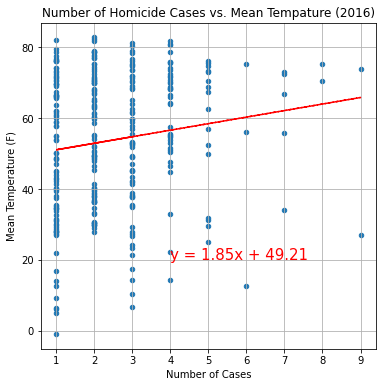

The r-value is: 0.0217611945948831


In [19]:
# Create a scatter plot which compares number of homicides to mean Temp

merge_data.plot(kind="scatter", x="CASE #", y="Temp(F)", grid=True, figsize=(6,6),
              title="Number of Homicide Cases vs. Mean Tempature (2016)")
plt.xlabel('Number of Cases')
plt.ylabel('Mean Temperature (F)')
plt.plot(x_axis,fit,"--",color="r")
plt.annotate(line_eq,(4,20),fontsize=15,color="red")

# export and plot figure
plt.savefig("images/temp_scatter.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [20]:
# read in csv file with combined homicide data
combined_homicide = pd.read_csv("Data/homicide_alivia.csv")

combined_homicide.head()

,CASE #,Date of Occurance,Primary Description,Description,Beat,Ward,Year,Latitude,Longitude,Case #,Date of Occurrence,District #,Case Number,Date,Primary Type
0,HT405253,07/19/2011 04:00:00 PM,HOMICIDE,FIRST DEGREE MURDER,732,6.0,2011,41.766565,-87.638386,NaN,NaN,NaN,NaN,NaN,NaN
1,HT578691,11/07/2011 12:05:00 PM,HOMICIDE,FIRST DEGREE MURDER,2123,4.0,2011,41.822200,-87.602135,NaN,NaN,NaN,NaN,NaN,NaN
2,HT576092,11/05/2011 01:50:00 PM,HOMICIDE,FIRST DEGREE MURDER,1122,28.0,2011,41.877169,-87.719061,NaN,NaN,NaN,NaN,NaN,NaN
3,HT581763,11/09/2011 02:00:00 PM,HOMICIDE,FIRST DEGREE MURDER,522,34.0,2011,41.688889,-87.628242,NaN,NaN,NaN,NaN,NaN,NaN
4,HT582731,11/10/2011 02:40:00 AM,HOMICIDE,FIRST DEGREE MURDER,614,18.0,2011,41.741304,-87.659690,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Here we are grabbing poverty data from this census API.
# This query returns an estimate number of households with income below the poverty level in Chicago in 2006.
poverty_2006_query = f"https://api.census.gov/data/2006/acs/acs1?get=B17009_002E&for=place:14000&in=state:17&key={census_api}"

poverty_2006_response = requests.get(poverty_2006_query).json()

poverty_2006 = poverty_2006_response[1][0]

poverty_2006

'161070'

In [22]:
# This query returns an estimate number of households with income below the poverty level in Chicago in 2011.
poverty_2011_query = f"https://api.census.gov/data/2011/acs/acs1?get=B17009_002E&for=place:14000&in=state:17&key={census_api}"

poverty_2011_response = requests.get(poverty_2011_query).json()

poverty_2011 = poverty_2011_response[1][0]

poverty_2011

'179036'

In [23]:
# This query returns an estimate number of households with income below the poverty level in Chicago in 2016.
poverty_2016_query = f"https://api.census.gov/data/2016/acs/acs1?get=B17009_002E&for=place:14000&in=state:17&key={census_api}"

poverty_2016_response = requests.get(poverty_2016_query).json()

poverty_2016 = poverty_2016_response[1][0]

poverty_2016

'172571'

In [24]:
# Use value_counts() to find how many homicides there were each year (2001, 2006, 2011, 2016, 2020)
homicides_per_year = combined_homicide['Year'].value_counts()

homicides_per_year

2020    813
2016    788
2001    667
2006    477
2011    438
Name: Year, dtype: int64

In [25]:
# Create dataframe using the variable we just created for number of homicides each year
homicides_poverty_df = pd.DataFrame(homicides_per_year).reset_index()
# Rename columns
homicides_poverty_df = homicides_poverty_df.rename(columns={'index':'Year','Year':'Homicides'})
# Sort dataframe to show data in ascending order by year
homicides_poverty_df = homicides_poverty_df.sort_values('Year').reset_index(drop=True)
# Because we only have poverty level data for 2006, 2011, and 2016, we can drop rows for 2001 and 2020
homicides_poverty_df = homicides_poverty_df.drop(labels=[0,4], axis=0).reset_index(drop=True)
# Add poverty level column with data
homicides_poverty_df['Households Below Poverty Level'] = [poverty_2006, poverty_2011, poverty_2016]

homicides_poverty_df

,Year,Homicides,Households Below Poverty Level
0,2006,477,161070
1,2011,438,179036
2,2016,788,172571


In [26]:
# We used an API to get poverty levels data, so the values that were returned are strings.
# Change data type to integer so it can be displayed in a bar chart
homicides_poverty_df['Households Below Poverty Level'] = homicides_poverty_df['Households Below Poverty Level'].astype(int)

# Check to make sure the data types for each column are integers
homicides_poverty_df.dtypes

Year                              int64
Homicides                         int64
Households Below Poverty Level    int32
dtype: object

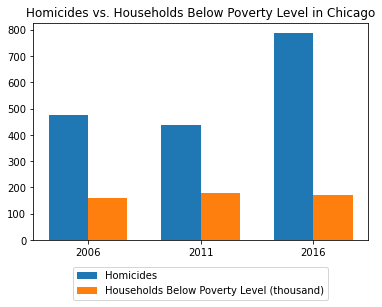

In [27]:
# Create variables to hold data from dataframe for bar chart
years = homicides_poverty_df['Year']
homicides = homicides_poverty_df['Homicides']
poverty_levels = homicides_poverty_df['Households Below Poverty Level']

# Create x axis and width variables (width is for the width of each bar)
x_axis = np.arange(len(years))
width = 0.35

# Create bar chart
fig, ax = plt.subplots()
# Bars for homicide data
ax.bar(x_axis - width/2, homicides, width, label='Homicides')
# Bars for poverty levels data (divided by 1000 so it can be displayed alongside the homicide data)
ax.bar(x_axis + width/2, poverty_levels/1000, width, label='Households Below Poverty Level (thousand)')

# Create xticks, add title, and add legend
ax.set_xticks(x_axis)
ax.set_xticklabels(years)
ax.set_title('Homicides vs. Households Below Poverty Level in Chicago')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.savefig("Images/HomicidesvPoverty.png")
plt.show()

In [28]:
# Read in csv with poverty levels data by community area in Chicago from 2008-2012
community_area_pov = pd.read_csv("Data/socioeconomic_census.csv")
# Drop the last row that has unnecessary data
community_area_pov = community_area_pov.drop(labels=[77], axis=0)

community_area_pov

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
72,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0


In [29]:
# Read in csv with number of homicides in each community area in Chicago from 2008-2012
community_area_homicides = pd.read_csv("Data/community_area_data.csv")
# Change column name to match the previous dataframe so they can be merged together
community_area_homicides = community_area_homicides.rename(columns={'Community Area':'Community Area Number'})

community_area_homicides

,Community Area Number,Homicides
0,25,94
1,67,78
2,23,71
3,68,59
4,29,58
...,...,...
68,72,1
69,64,1
70,55,1
71,5,1


In [30]:
# Merge the two dataframes
merged_community_area = community_area_pov.merge(community_area_homicides, on='Community Area Number')

merged_community_area

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Homicides
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,9
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,3
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,10
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,1
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,1
...,...,...,...,...,...,...,...,...,...,...
68,71.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528,74.0,54
69,72.0,Beverly,0.9,5.1,8.0,3.7,40.5,39523,12.0,1
70,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,18
71,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0,19


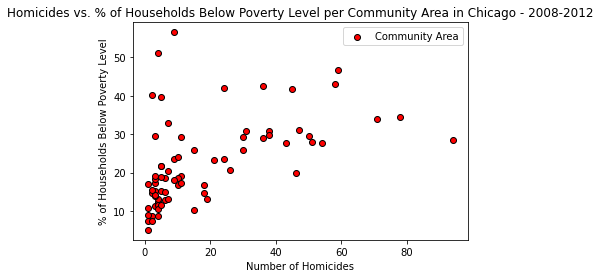

In [31]:
# Create variables for scatter plot using community area dataframe
area = merged_community_area['Community Area Number']
area_homicides = merged_community_area['Homicides']
area_poverty = merged_community_area['PERCENT HOUSEHOLDS BELOW POVERTY']

# Create scatter plot comparing number of homicides vs. poverty level in each community area
plt.scatter(area_homicides, area_poverty, marker="o", facecolors="red", edgecolors="black", label='Community Area')
plt.title("Homicides vs. % of Households Below Poverty Level per Community Area in Chicago - 2008-2012")
plt.xlabel("Number of Homicides")
plt.ylabel("% of Households Below Poverty Level")
plt.legend(loc='best')

plt.savefig("Images/CommunityArea_HomicidesvPoverty.png")
plt.show()

In [32]:
# Sort the dataframe by number of homicides in descending order
max_homicides = merged_community_area.sort_values(by=['Homicides'], ascending=False)

max_homicides

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Homicides
22,25.0,Austin,6.3,28.6,22.6,24.4,37.9,15957,73.0,94
64,67.0,West Englewood,4.8,34.4,35.9,26.3,40.7,11317,89.0,78
20,23.0,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0,71
65,68.0,Englewood,3.8,46.6,28.0,28.5,42.5,11888,94.0,59
26,29.0,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0,58
...,...,...,...,...,...,...,...,...,...,...
61,64.0,Clearing,2.7,8.9,9.5,18.8,37.6,25113,29.0,1
52,55.0,Hegewisch,3.3,17.1,9.6,19.2,42.9,22677,44.0,1
69,72.0,Beverly,0.9,5.1,8.0,3.7,40.5,39523,12.0,1
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,1


In [33]:
# Make dataframe with top 5 community areas in Chicago with the highest numbers of homicides from 2008-2012
max_community_areas = max_homicides.head(5)

max_community_areas

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Homicides
22,25.0,Austin,6.3,28.6,22.6,24.4,37.9,15957,73.0,94
64,67.0,West Englewood,4.8,34.4,35.9,26.3,40.7,11317,89.0,78
20,23.0,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0,71
65,68.0,Englewood,3.8,46.6,28.0,28.5,42.5,11888,94.0,59
26,29.0,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0,58


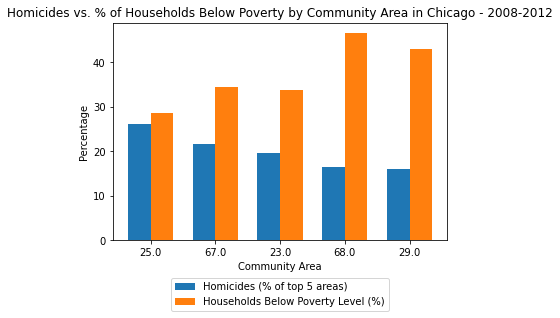

In [34]:
# Create variables to hold data from dataframe for bar chart
max_area = max_community_areas['Community Area Number']
max_area_homicides = max_community_areas['Homicides']
max_area_poverty = max_community_areas['PERCENT HOUSEHOLDS BELOW POVERTY']

# To make bar chart easier to understand, calculate the total number of homicides for the 5 community areas with the
# highest number of homicides. Then calculate the percentages of homicides each community area accounts for.
total_area_homicides = max_community_areas['Homicides'].sum()
homicide_percent = [(area / total_area_homicides) * 100 for area in max_area_homicides]

# Create x axis and width variables (width is for the width of each bar)
x_axis = np.arange(len(max_area))
width = 0.35

# Create bar chart
fig, ax = plt.subplots()
# Bars for homicides data by community area
ax.bar(x_axis - width/2, homicide_percent, width, label='Homicides (% of top 5 areas)')
# Bars for poverty levels data by community area (percentages)
ax.bar(x_axis + width/2, max_area_poverty, width, label='Households Below Poverty Level (%)')

# Create xticks, add title, and add legend
ax.set_xticks(x_axis)
ax.set_xticklabels(max_area)
ax.set_xlabel('Community Area')
ax.set_ylabel('Percentage')
ax.set_title('Homicides vs. % of Households Below Poverty by Community Area in Chicago - 2008-2012')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))

plt.savefig("Images/Top5CommunityAreas_HomicidesvPoverty.png")
plt.show()